In [1]:

import numpy as np 
import pandas as pd  

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV,cross_val_score,cross_val_predict
from numpy import log, log1p
from scipy.stats import boxcox
import pylab
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("insurance.csv")
df=data.copy()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print("row :",df.shape[0]," ","column :",df.shape[1])

row : 1338   column : 7


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df.describe(include=["object"]).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [7]:
print("Sum of missing values :",df.isnull().sum().sum())

Sum of missing values : 0


In [8]:
df.eq(0).sum()

age           0
sex           0
bmi           0
children    574
smoker        0
region        0
charges       0
dtype: int64

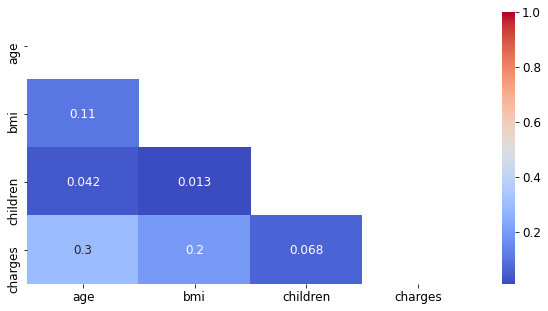

In [9]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,5))
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask)

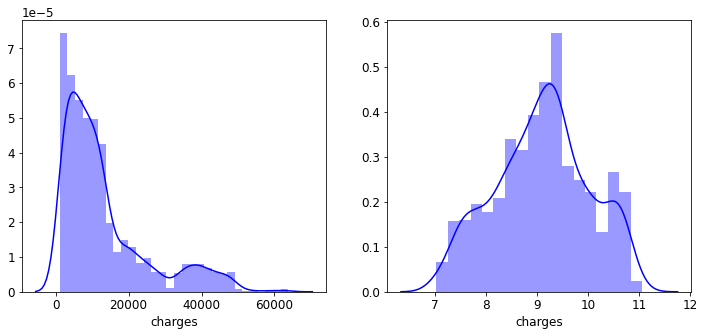

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df.charges,color="b")
plt.subplot(122)
sns.distplot(log(df.charges),color="b")



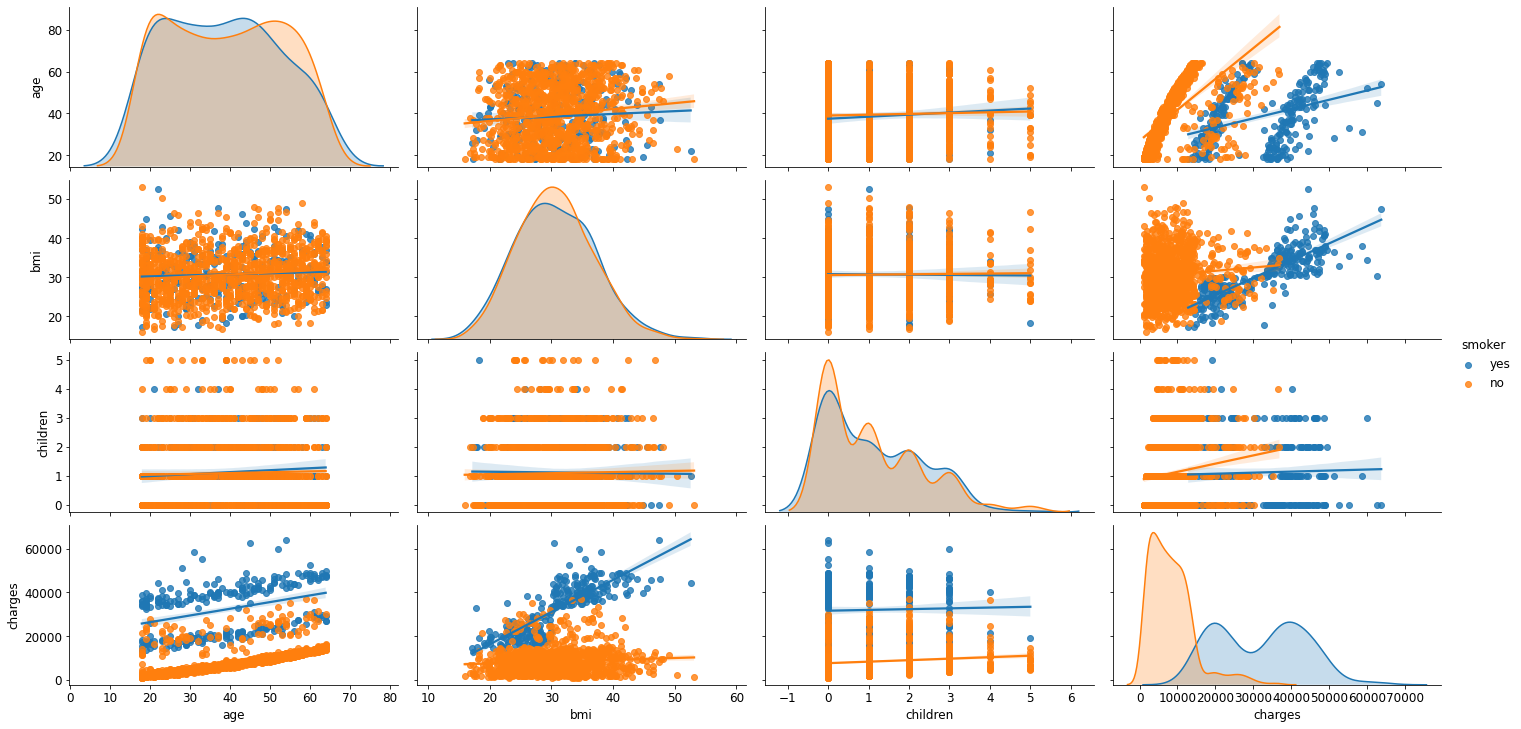

In [11]:
sns.pairplot(df,kind="reg",hue="smoker",aspect=2)

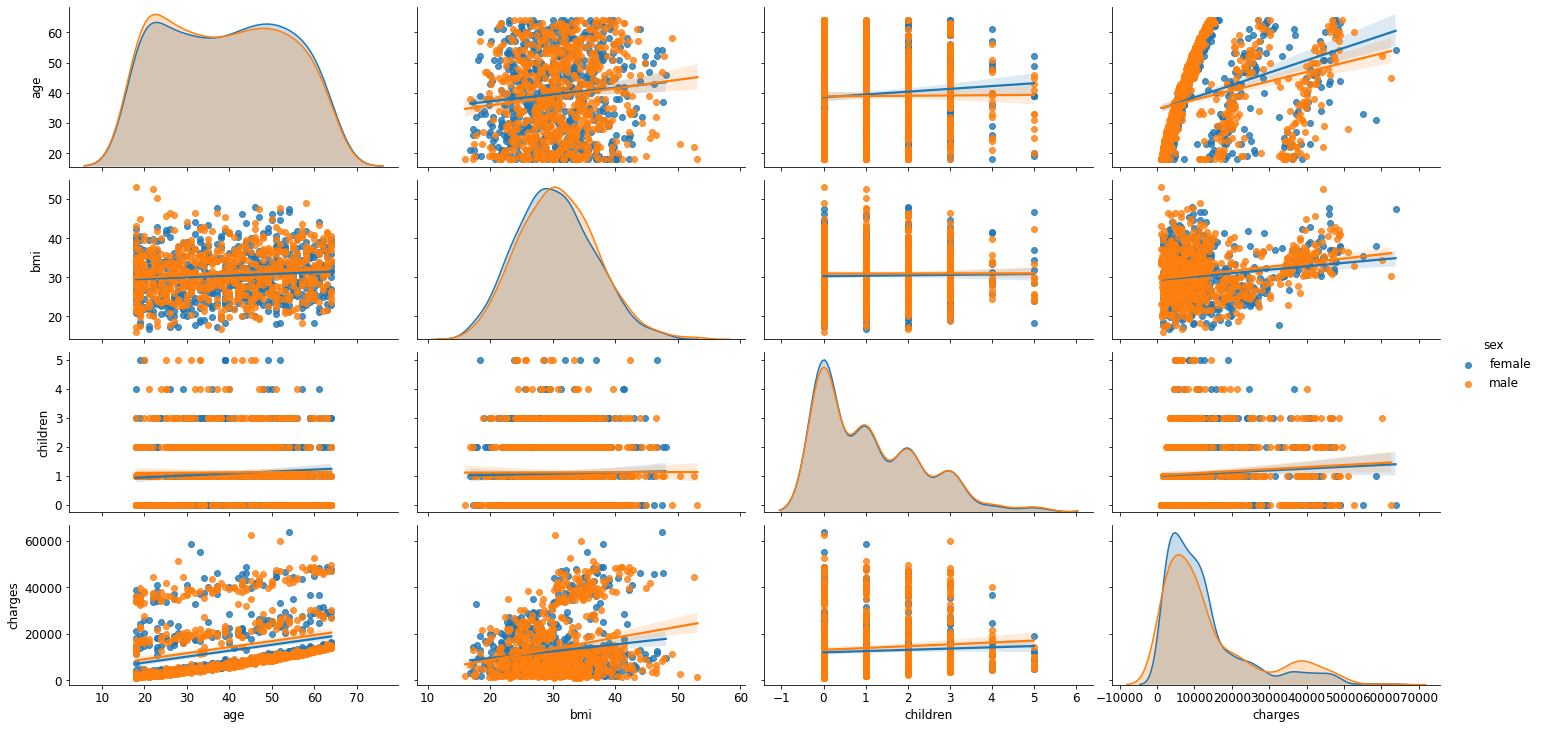

In [12]:
sns.pairplot(df,kind="reg",hue="sex",aspect=2)

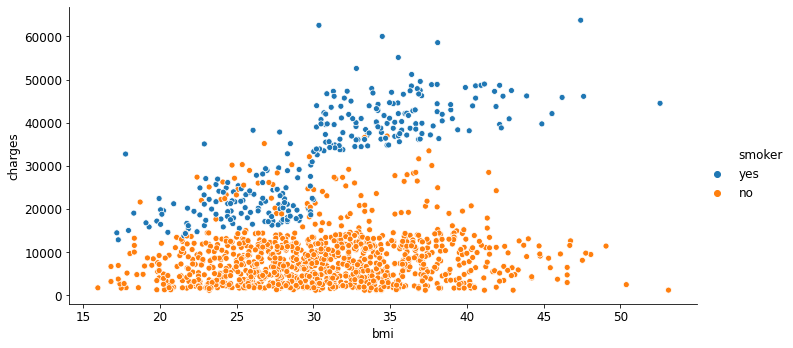

In [13]:
sns.relplot(x="bmi",y="charges",hue="smoker",data=df,kind="scatter",aspect=2)

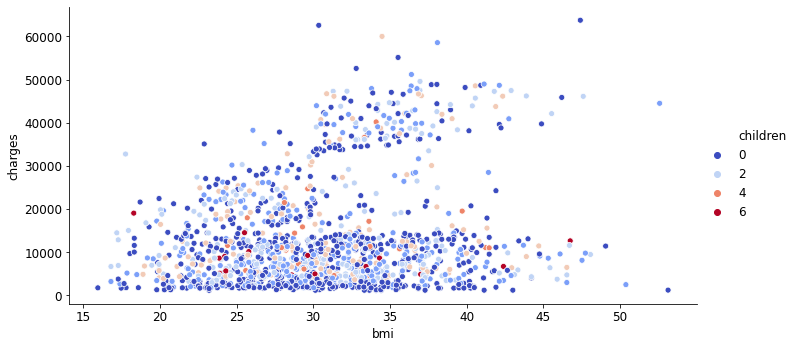

In [14]:
sns.relplot(x="bmi",y="charges",hue="children",data=df,kind="scatter",aspect=2,palette='coolwarm')

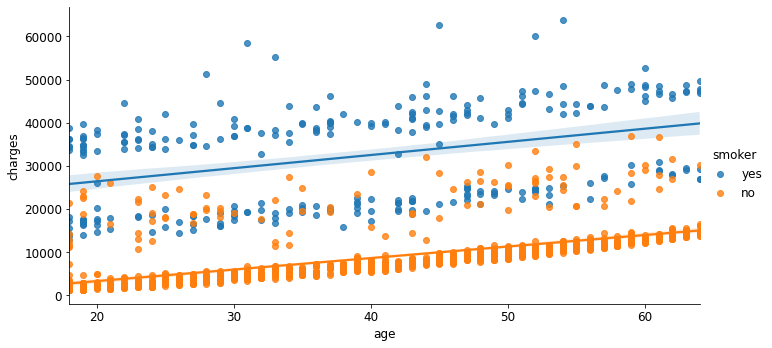

In [15]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df,aspect=2)

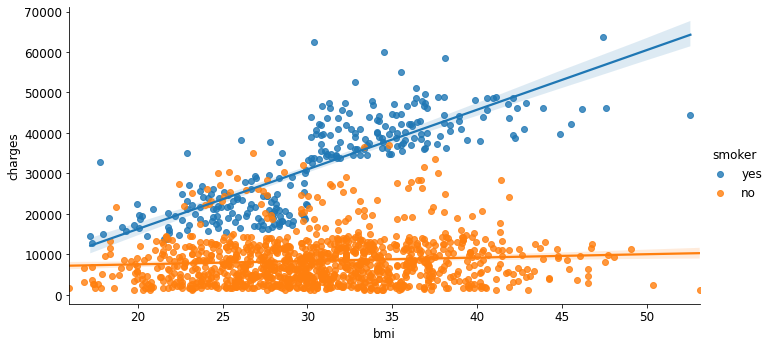

In [16]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df,aspect=2)

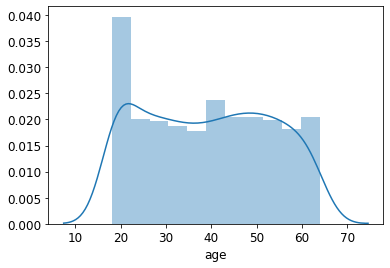

In [17]:
sns.distplot(df.age)

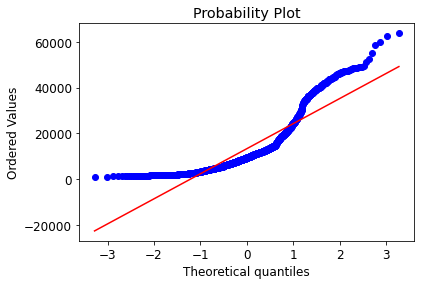

In [18]:
stats.probplot(df.charges, dist="norm", plot=pylab) ;

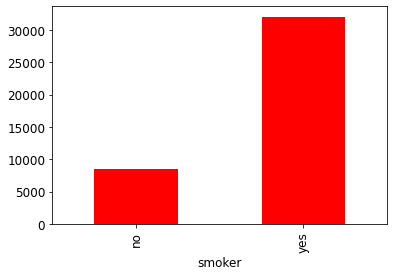

In [19]:
df.groupby("smoker")["charges"].mean().plot.bar(color="r")

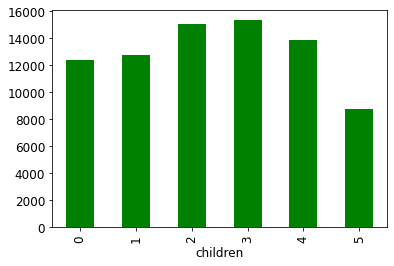

In [20]:
df.groupby("children")["charges"].mean().plot.bar(color="g")

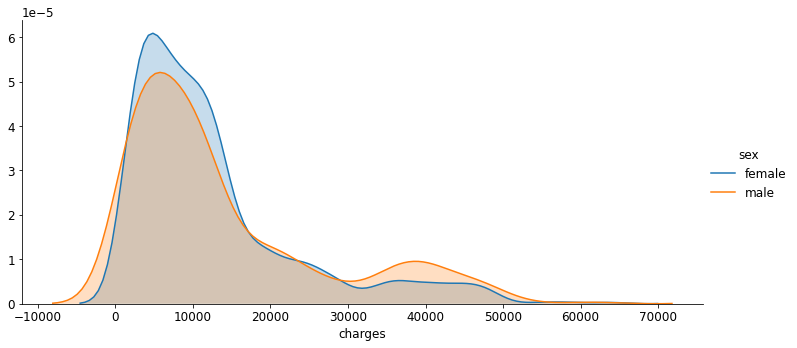

In [21]:
print(sns.FacetGrid(df,hue="sex",height=5,aspect=2).map(sns.kdeplot,"charges",shade=True).add_legend())

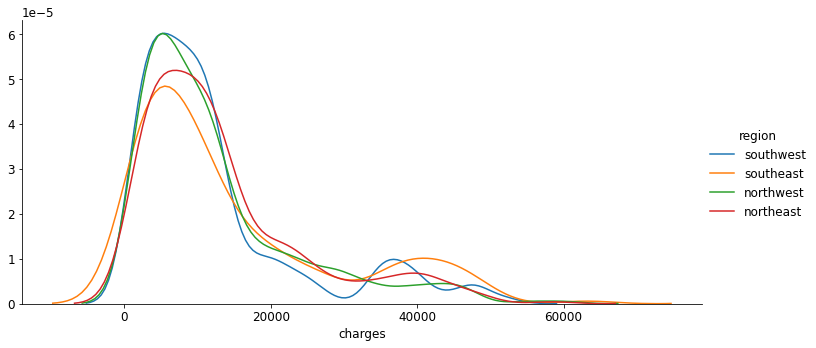

In [22]:
print(sns.FacetGrid(df,hue="region",height=5,aspect=2).map(sns.kdeplot,"charges",shade=False).add_legend())

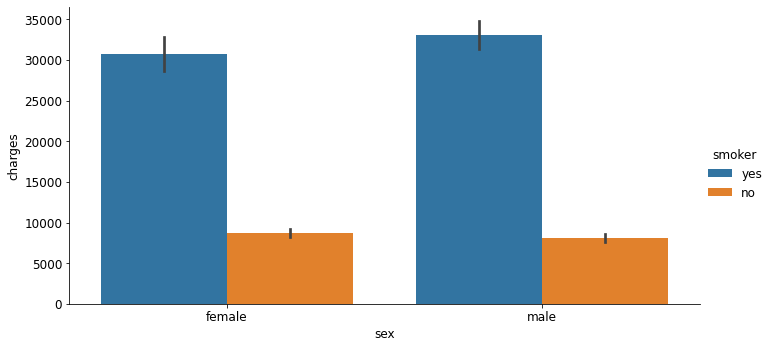

In [23]:
print(sns.catplot(x="sex",y="charges",hue="smoker",data=df,kind="bar",aspect=2))

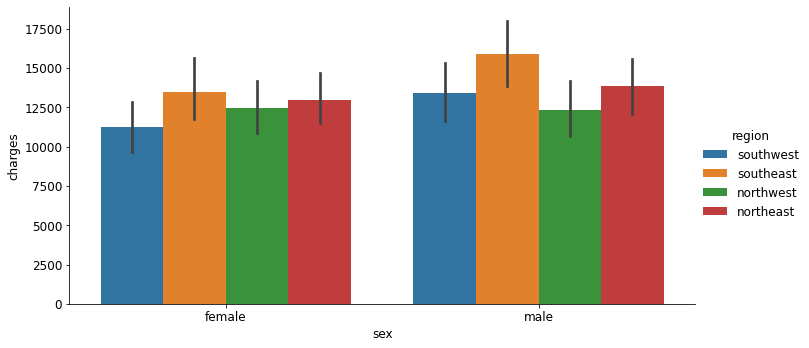

In [24]:
print(sns.catplot(x="sex",y="charges",hue="region",data=df,kind="bar",aspect=2))

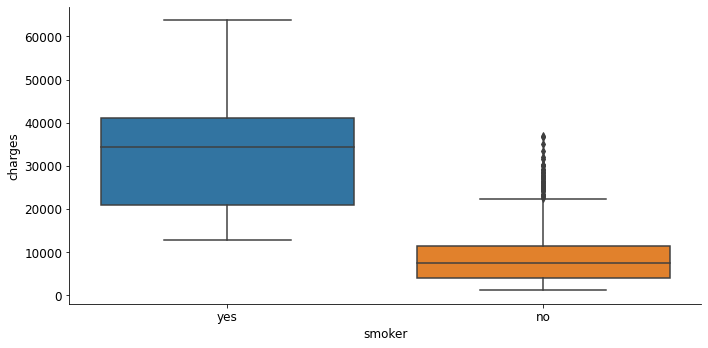

In [25]:
sns.catplot(x="smoker",y="charges",data=df,kind="box",aspect=2)

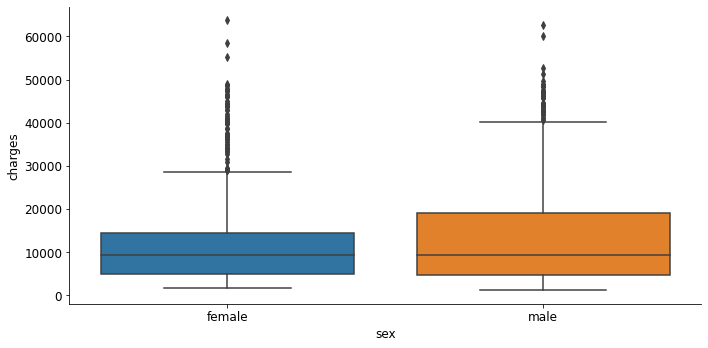

In [26]:
sns.catplot(x="sex",y="charges",data=df,kind="box",aspect=2)

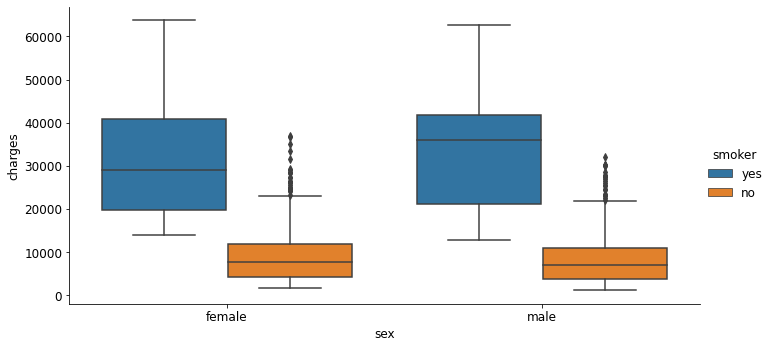

In [27]:
sns.catplot(x="sex",y="charges",hue="smoker",data=df,kind="box",aspect=2)

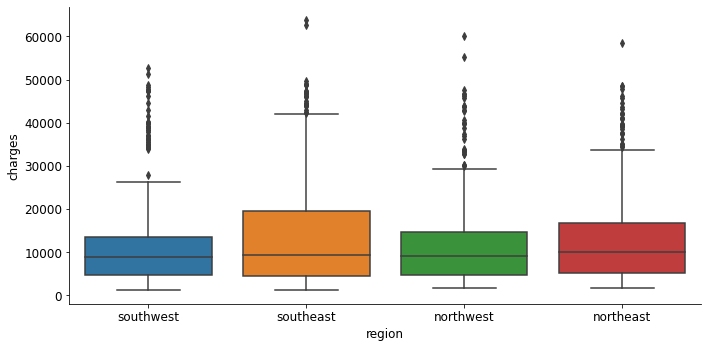

In [28]:
sns.catplot(x="region",y="charges",data=df,kind="box",aspect=2)

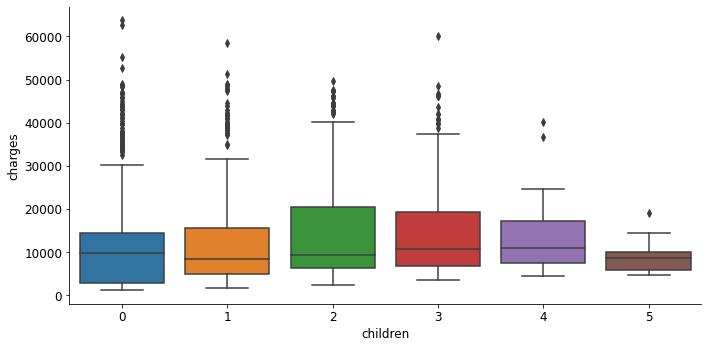

In [29]:
sns.catplot(x="children",y="charges",data=df,kind="box",aspect=2)

In [30]:
labels=["too_weak","normal","heavy","too_heavy"]
ranges=[0,18.5,24.9,29.9,np.inf]
df["bmi"]=pd.cut(df["bmi"],bins=ranges,labels=labels)

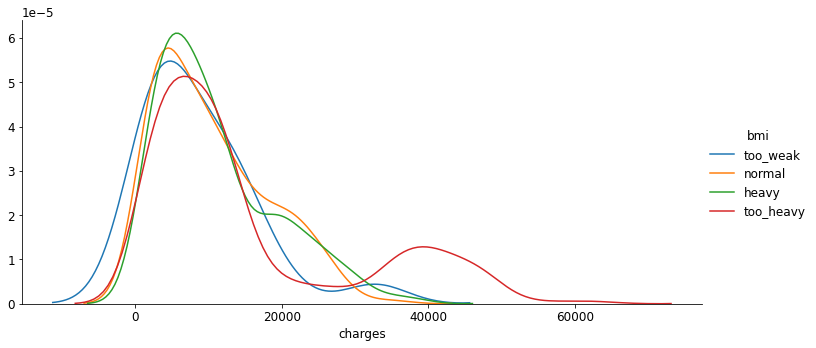

In [31]:
print(sns.FacetGrid(df,hue="bmi",height=5,aspect=2).map(sns.kdeplot,"charges",shade=False).add_legend())

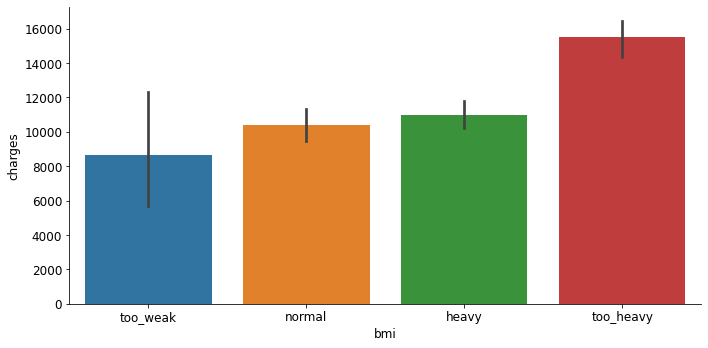

In [32]:
print(sns.catplot(x="bmi",y="charges",kind="bar",data=df,aspect=2))

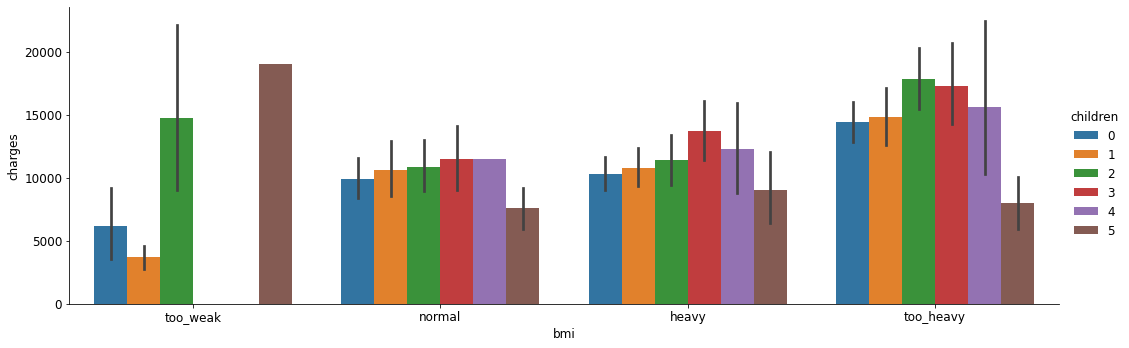

In [33]:
print(sns.catplot(x="bmi",y="charges",hue="children",kind="bar",data=df,aspect=3))

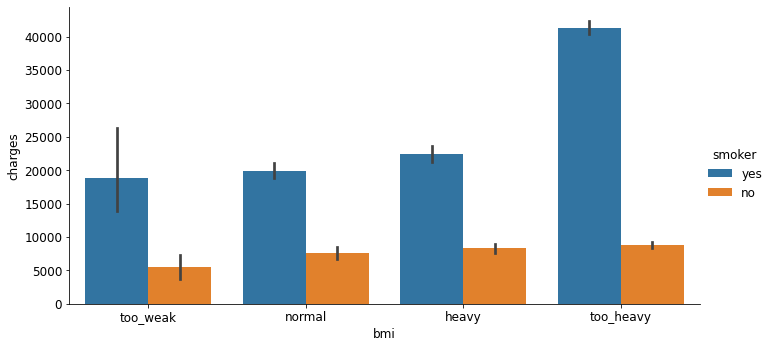

In [34]:
print(sns.catplot(x="bmi",y="charges",hue="smoker",data=df,kind="bar",aspect=2))

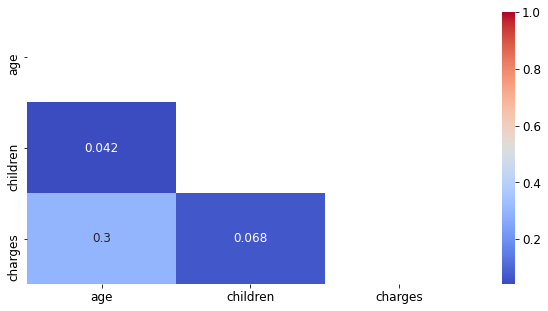

In [35]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,5))
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask)

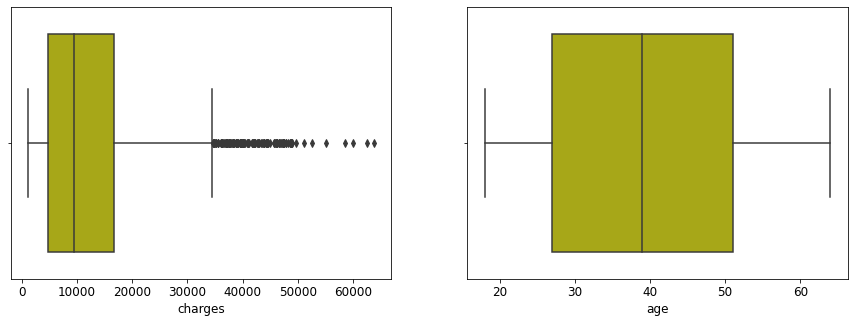

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(df["charges"],color="y")
plt.subplot(122)
sns.boxplot(df["age"],color="y")

In [37]:
pd.crosstab(df.age,df.children)[:10]

children,0,1,2,3,4,5
age,,,,,,
18,51,9,6,2,1,0
19,50,11,5,1,0,1
20,17,6,3,1,0,2
21,16,5,5,1,1,0
22,18,4,2,4,0,0
23,13,6,5,4,0,0
24,23,1,1,2,1,0
25,12,6,4,3,2,1
26,10,9,7,1,1,0


In [38]:
df[(df["age"]==18)&(df["sex"]=="female")&(df["children"]>0)]

,age,sex,bmi,children,smoker,region,charges
46,18,female,too_heavy,2,no,northeast,3393.35635
469,18,female,normal,1,no,southeast,2201.09710
564,18,female,too_heavy,2,no,southeast,2801.25880
571,18,female,too_heavy,1,no,southeast,2219.44510
1095,18,female,too_heavy,4,no,northeast,4561.18850
1204,18,female,heavy,3,yes,southeast,18223.45120


In [39]:
df[(df["age"]==18)&(df["sex"]=="male")&(df["children"]>0)]

,age,sex,bmi,children,smoker,region,charges
1,18,male,too_heavy,1,no,southeast,1725.55230
57,18,male,too_heavy,2,yes,southeast,34303.16720
250,18,male,too_weak,2,yes,northeast,12829.45510
270,18,male,heavy,1,no,southeast,1719.43630
369,18,male,too_heavy,3,no,northeast,3481.86800
710,18,male,too_heavy,1,no,southeast,1727.54000
938,18,male,heavy,2,no,southeast,2304.00220
1023,18,male,normal,1,no,southeast,1711.02680
1080,18,male,normal,2,no,southeast,11884.04858
1170,18,male,heavy,1,yes,northeast,17178.68240


In [40]:
clf=LocalOutlierFactor(n_neighbors=50)
clf.fit_predict(df[["age","children"]])

array([-1, -1,  1, ...,  1,  1,  1])

In [41]:
clf_scores=clf.negative_outlier_factor_

In [42]:
np.sort(clf_scores)[0:20]

array([-5.60000000e+09, -5.60000000e+09, -5.60000000e+09, -5.60000000e+09,
       -5.60000000e+09, -5.60000000e+09, -5.60000000e+09, -5.60000000e+09,
       -5.60000000e+09, -4.95028623e+09, -4.95028623e+09, -4.95028623e+09,
       -4.95028623e+09, -4.95028623e+09, -4.95028623e+09, -1.44867022e+09,
       -1.44867022e+09, -2.00000001e+08, -2.00000001e+08, -2.00000001e+08])

In [43]:
treshold=np.sort(clf_scores)[20]

In [44]:
df[clf_scores<treshold]

,age,sex,bmi,children,smoker,region,charges
1,18,male,too_heavy,1,no,southeast,1725.55230
46,18,female,too_heavy,2,no,northeast,3393.35635
57,18,male,too_heavy,2,yes,southeast,34303.16720
250,18,male,too_weak,2,yes,northeast,12829.45510
270,18,male,heavy,1,no,southeast,1719.43630
369,18,male,too_heavy,3,no,northeast,3481.86800
469,18,female,normal,1,no,southeast,2201.09710
564,18,female,too_heavy,2,no,southeast,2801.25880
571,18,female,too_heavy,1,no,southeast,2219.44510
710,18,male,too_heavy,1,no,southeast,1727.54000


In [45]:
df[(df["age"]==18)&(df["children"]>1)]

,age,sex,bmi,children,smoker,region,charges
46,18,female,too_heavy,2,no,northeast,3393.35635
57,18,male,too_heavy,2,yes,southeast,34303.16720
250,18,male,too_weak,2,yes,northeast,12829.45510
369,18,male,too_heavy,3,no,northeast,3481.86800
564,18,female,too_heavy,2,no,southeast,2801.25880
938,18,male,heavy,2,no,southeast,2304.00220
1080,18,male,normal,2,no,southeast,11884.04858
1095,18,female,too_heavy,4,no,northeast,4561.18850
1204,18,female,heavy,3,yes,southeast,18223.45120


In [46]:
df.drop(df[(df["age"]==18)&(df["children"]>0)].index,inplace=True)

In [47]:
df.corr()

,age,children,charges
age,1.000000,0.054326,0.295261
children,0.054326,1.000000,0.070716
charges,0.295261,0.070716,1.000000


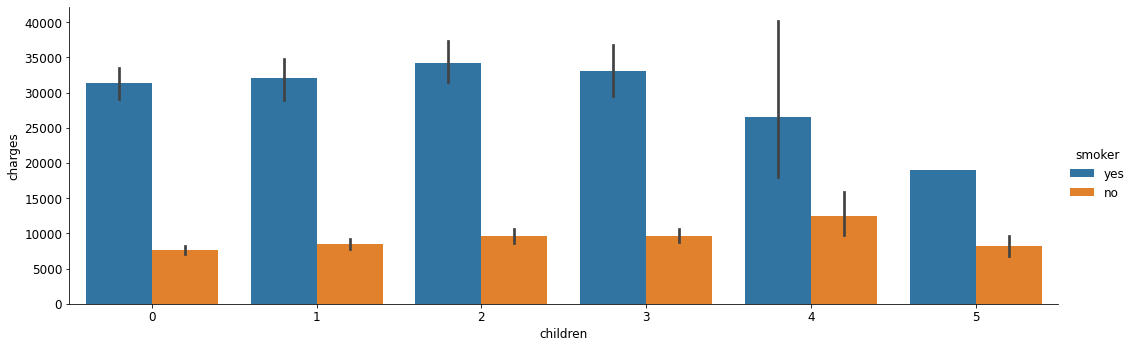

In [48]:
print(sns.catplot(x="children",y="charges",hue="smoker",data=df,kind="bar",aspect=3))

In [49]:
df.shape

(1320, 7)

In [50]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,heavy,0,yes,southwest,16884.92400
2,28,male,too_heavy,3,no,southeast,4449.46200
3,33,male,normal,0,no,northwest,21984.47061
4,32,male,heavy,0,no,northwest,3866.85520
5,31,female,heavy,0,no,southeast,3756.62160


In [51]:
df_new=df.copy()
df_new=pd.get_dummies(data=df,columns=["sex","smoker"],drop_first=True)

In [52]:
df_new.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,heavy,0,southwest,16884.92400,0,1
2,28,too_heavy,3,southeast,4449.46200,1,0
3,33,normal,0,northwest,21984.47061,1,0
4,32,heavy,0,northwest,3866.85520,1,0
5,31,heavy,0,southeast,3756.62160,0,0


In [53]:
df_new=pd.get_dummies(data=df_new,columns=["region","bmi"])

In [54]:
df_new.head()

,age,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_too_weak,bmi_normal,bmi_heavy,bmi_too_heavy
0,19,0,16884.92400,0,1,0,0,0,1,0,0,1,0
2,28,3,4449.46200,1,0,0,0,1,0,0,0,0,1
3,33,0,21984.47061,1,0,0,1,0,0,0,1,0,0
4,32,0,3866.85520,1,0,0,1,0,0,0,0,1,0
5,31,0,3756.62160,0,0,0,0,1,0,0,0,1,0


In [55]:
df_new.charges=log(df_new.charges)

sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df_new),columns=df_new.columns,index=df_new.index)

df_scaled.head()

,age,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_too_weak,bmi_normal,bmi_heavy,bmi_too_heavy
0,-1.472578,-0.900260,0.684392,-1.006079,1.972027,-0.563352,-0.571518,-0.603023,1.749725,-0.124035,-0.444772,1.587451,-1.073939
2,-0.825961,1.585814,-0.773628,0.993958,-0.507093,-0.563352,-0.571518,1.658312,-0.571518,-0.124035,-0.444772,-0.629941,0.931152
3,-0.466729,-0.900260,0.972921,0.993958,-0.507093,-0.563352,1.749725,-0.603023,-0.571518,-0.124035,2.248343,-0.629941,-1.073939
4,-0.538575,-0.900260,-0.927058,0.993958,-0.507093,-0.563352,1.749725,-0.603023,-0.571518,-0.124035,-0.444772,1.587451,-1.073939
5,-0.610422,-0.900260,-0.958677,-1.006079,-0.507093,-0.563352,-0.571518,1.658312,-0.571518,-0.124035,-0.444772,1.587451,-1.073939


In [56]:
X=df_scaled.drop("charges",axis=1)
y=df_scaled["charges"] 

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1056, 12)
(264, 12)
(1056,)
(264,)


In [59]:
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              340.5
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                   1.28e-320
Time:                        13:54:23   Log-Likelihood:                         -737.26
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1046   BIC:                                      1544.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5171      0.015     34.096      0.000       0.487       0.547
children             0.1413      0.015      9.237      0.000       0.111       0.171
sex_male            -0.0469      0.015     -3.100      0.002      -0.077      -0.017
smoker_yes           0.6690      0.015     44.603      0.000       0.640       0.698
region_northeast     0.0411      0.011      3.596      0.000       0.019       0.064
region_northwest     0.0102      0.011      0.897      0.370      -0.012       0.032
region_southeast    -0.0230      0.011     -2.018      0.044      -0.045      -0.001
region_southwest    -0.0274      0.011     -2.406      0.016      -0.050      -0.005
bmi_too_weak        -0.0282      0.015     -1.910      0.056      -0.057       0.001
bmi_normal          -0.0431      0.012     -3.618      0.000      -0.066      -0.020
bmi_heavy           -0.0163      0.010     -1.618      0.106      -0.036       0.003
bmi_too_heavy        0.0538      0.009      5.921      0.000       0.036       0.072
==============================================================================
Omnibus:                      366.610   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1277.443
Skew:                           1.680   Prob(JB):                    4.04e-278
Kurtosis:                       7.212   Cond. No.                     5.84e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
X=df_scaled.drop(["charges","region_northwest"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              340.5
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                   1.28e-320
Time:                        13:54:23   Log-Likelihood:                         -737.26
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1046   BIC:                                      1544.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5171      0.015     34.096      0.000       0.487       0.547
children             0.1413      0.015      9.237      0.000       0.111       0.171
sex_male            -0.0469      0.015     -3.100      0.002      -0.077      -0.017
smoker_yes           0.6690      0.015     44.603      0.000       0.640       0.698
region_northeast     0.0310      0.018      1.686      0.092      -0.005       0.067
region_southeast    -0.0334      0.019     -1.771      0.077      -0.070       0.004
region_southwest    -0.0376      0.018     -2.032      0.042      -0.074      -0.001
bmi_too_weak        -0.0282      0.015     -1.910      0.056      -0.057       0.001
bmi_normal          -0.0431      0.012     -3.618      0.000      -0.066      -0.020
bmi_heavy           -0.0163      0.010     -1.618      0.106      -0.036       0.003
bmi_too_heavy        0.0538      0.009      5.921      0.000       0.036       0.072
==============================================================================
Omnibus:                      366.610   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1277.443
Skew:                           1.680   Prob(JB):                    4.04e-278
Kurtosis:                       7.212   Cond. No.                     5.48e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
X=df_scaled.drop(["charges","region_northwest","bmi_heavy"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              340.5
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                   1.28e-320
Time:                        13:54:23   Log-Likelihood:                         -737.26
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1046   BIC:                                      1544.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5171      0.015     34.096      0.000       0.487       0.547
children             0.1413      0.015      9.237      0.000       0.111       0.171
sex_male            -0.0469      0.015     -3.100      0.002      -0.077      -0.017
smoker_yes           0.6690      0.015     44.603      0.000       0.640       0.698
region_northeast     0.0310      0.018      1.686      0.092      -0.005       0.067
region_southeast    -0.0334      0.019     -1.771      0.077      -0.070       0.004
region_southwest    -0.0376      0.018     -2.032      0.042      -0.074      -0.001
bmi_too_weak        -0.0238      0.015     -1.545      0.123      -0.054       0.006
bmi_normal          -0.0296      0.017     -1.698      0.090      -0.064       0.005
bmi_too_heavy        0.0718      0.017      4.109      0.000       0.038       0.106
==============================================================================
Omnibus:                      366.610   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1277.443
Skew:                           1.680   Prob(JB):                    4.04e-278
Kurtosis:                       7.212   Cond. No.                         2.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X=df_scaled.drop(["charges","region_northwest","bmi_heavy","bmi_too_weak"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              377.6
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                   2.10e-321
Time:                        13:54:23   Log-Likelihood:                         -738.46
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1047   BIC:                                      1540.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5186      0.015     34.234      0.000       0.489       0.548
children             0.1418      0.015      9.268      0.000       0.112       0.172
sex_male            -0.0463      0.015     -3.059      0.002      -0.076      -0.017
smoker_yes           0.6690      0.015     44.575      0.000       0.640       0.698
region_northeast     0.0299      0.018      1.624      0.105      -0.006       0.066
region_southeast    -0.0323      0.019     -1.712      0.087      -0.069       0.005
region_southwest    -0.0370      0.018     -2.003      0.045      -0.073      -0.001
bmi_normal          -0.0259      0.017     -1.497      0.135      -0.060       0.008
bmi_too_heavy        0.0763      0.017      4.421      0.000       0.042       0.110
==============================================================================
Omnibus:                      368.568   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1289.808
Skew:                           1.688   Prob(JB):                    8.35e-281
Kurtosis:                       7.233   Cond. No.                         2.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X=df_scaled.drop(["charges","region_northwest","bmi_heavy","bmi_too_weak","bmi_normal"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              424.0
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                   3.01e-322
Time:                        13:54:23   Log-Likelihood:                         -739.59
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1048   BIC:                                      1535.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5197      0.015     34.334      0.000       0.490       0.549
children             0.1417      0.015      9.255      0.000       0.112       0.172
sex_male            -0.0460      0.015     -3.042      0.002      -0.076      -0.016
smoker_yes           0.6681      0.015     44.524      0.000       0.639       0.698
region_northeast     0.0287      0.018      1.559      0.119      -0.007       0.065
region_southeast    -0.0326      0.019     -1.728      0.084      -0.070       0.004
region_southwest    -0.0369      0.018     -1.995      0.046      -0.073      -0.001
bmi_too_heavy        0.0880      0.015      5.730      0.000       0.058       0.118
==============================================================================
Omnibus:                      363.644   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1250.373
Skew:                           1.671   Prob(JB):                    3.05e-272
Kurtosis:                       7.153   Cond. No.                         2.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
X=df_scaled.drop(["charges","region_northwest","bmi_heavy","bmi_too_weak","bmi_normal","region_northeast"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              483.5
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                   4.45e-323
Time:                        13:54:23   Log-Likelihood:                         -740.81
No. Observations:                1056   AIC:                                      1496.
Df Residuals:                    1049   BIC:                                      1530.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5200      0.015     34.334      0.000       0.490       0.550
children             0.1408      0.015      9.200      0.000       0.111       0.171
sex_male            -0.0453      0.015     -2.994      0.003      -0.075      -0.016
smoker_yes           0.6687      0.015     44.539      0.000       0.639       0.698
region_southeast    -0.0472      0.016     -2.886      0.004      -0.079      -0.015
region_southwest    -0.0511      0.016     -3.176      0.002      -0.083      -0.020
bmi_too_heavy        0.0876      0.015      5.701      0.000       0.057       0.118
==============================================================================
Omnibus:                      361.530   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.485
Skew:                           1.664   Prob(JB):                    2.34e-268
Kurtosis:                       7.115   Cond. No.                         1.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model.params

age                 0.520042
children            0.140835
sex_male           -0.045307
smoker_yes          0.668671
region_southeast   -0.047242
region_southwest   -0.051133
bmi_too_heavy       0.087639
dtype: float64

In [66]:
model=LinearRegression()
lin_mo=model.fit(X_train,y_train)
y_pred=lin_mo.predict(X_test)

In [67]:
lin_mo.score(X_train,y_train)

0.7633938657815397

In [68]:
lin_mo.score(X_test,y_test)

0.7780368839718872

In [69]:
r2_score(y_test,y_pred)

0.7780368839718872

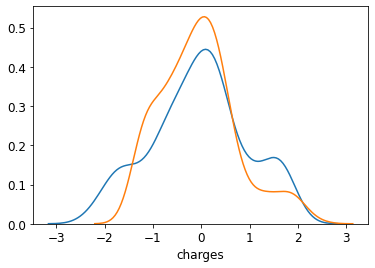

In [70]:
ax1=sns.distplot(y_test,hist=False)
sns.distplot(y_pred,ax=ax1,hist=False)